# COMPARISON OF HEIGHTS BETWEEN FAMILY MEMBERS

In this analysis, we use a dataset of 163 families which consists of the columns:
<br>
**FAMILY S.NO.** | **MEMBER** | **AGE** | **HEIGHT**

Here, I've imported the **pandas** library and further loaded our data into the variable `df` and formatted the family member names in all caps.

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('/home/zeborg/KRMU/SEM-3/USING DATA IN EVERYDAY LIFE/Height_Data_Merged.xlsx')
df.drop(columns=['Unnamed: 4','Unnamed: 5'], inplace=True)
df['MEMBER']=df['MEMBER'].str.upper()
df

,FAMILY,MEMBER,AGE,HEIGHT
0,1,FATHER,55,"5'8"""
1,1,MOTHER,50,5'
2,1,SON,21,"5'6"""
3,1,DAUGHTER,23,"5'4"""
4,2,FATHER,60,"5'9"""
...,...,...,...,...
688,162,DAUGHTER,30,5’6’
689,163,FATHER,58,5’7
690,163,MOTHER,54,5’5
691,163,SON,19,5’8


I've now stripped the leading and trailing whitespaces in the `MEMBER` column to make our analysis easier.
<br><br>
Then I've converted the column `HEIGHT` into `str` type. The reason behind this is to deal with both imperial and metric systems without having to worry about the conversion, as the logical operators are now working on the characters instead of numbers which would not alter our results anyway because of the ASCII characters' decimal value sequence.
<br><br>
Further, I've stripped the newline and double quotes characters from the `HEIGHT` column, and then I've added the column `UID` which would give a unique number to each and every member of all the families.

In [3]:
df['MEMBER']=df['MEMBER'].apply(lambda x:x.strip())
df['HEIGHT']=df['HEIGHT'].astype(str)
df['HEIGHT']=df['HEIGHT'].apply(lambda x:x.strip('"'))
df['HEIGHT']=df['HEIGHT'].apply(lambda x:x.strip('\n'))
for i in range(len(df.index)):
    df.loc[i,'UID'] = i

Now I've created dictionaries named `family` and `count`, which are only used for determining the overall No. of tallest people among all the different families for each `MEMBER`, as shown in the output of the cell below.

In [4]:
family=dict()
for i in range(1,df['FAMILY'].max()+1):
    k = df[df['FAMILY']==i]
    family[i] = ((k['HEIGHT'].max(),k[k['HEIGHT']==k['HEIGHT'].max()]['MEMBER'].to_list()))
count=dict()
for i in range(1,df['FAMILY'].max()+1):
    count[family[i][1][0]] = count.get(family[i][1][0],0)+1
for key,value in count.items():
    print(key,':',value)

FATHER : 77
SON : 69
MOTHER : 4
DAUGHTER : 13


In [5]:
pd.DataFrame.from_dict(count, orient='index').transpose().reindex(columns=['FATHER','SON','DAUGHTER','MOTHER'])

,FATHER,SON,DAUGHTER,MOTHER
0,77,69,13,4


In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df['FAMILY'].max() # Total number of families we have in our dataset

163

In [8]:
df.set_index(['FAMILY','MEMBER'],inplace=True) # Here I've used multi indexing to format our data in the proper family sequence

In [9]:
df

AGE HEIGHT    UID
FAMILY MEMBER                     
1      FATHER     55    5'8    0.0
       MOTHER     50     5'    1.0
       SON        21    5'6    2.0
       DAUGHTER   23    5'4    3.0
2      FATHER     60    5'9    4.0
...              ...    ...    ...
162    DAUGHTER   30   5’6’  688.0
163    FATHER     58    5’7  689.0
       MOTHER     54    5’5  690.0
       SON        19    5’8  691.0
       DAUGHTER   22    5’4  692.0

[693 rows x 3 columns]

The cell below creates the lists of oldest and youngest sons and daughters among all the families, and is the most important part of our analysis.
<br>
Keep in mind that in the lists below, a family having single son / daughter has got the same son / daughter as both the youngest and oldest son / daughter in the family. But this does not affect the data that we are going to analyse in the later cells.

In [10]:
df.sort_index(level=0,inplace=True)
k,m=dict(),list()

for i in range(1,df.index.max()[0]+1):
    l=list()
    for index, row in df.loc[i].T.iterrows():
        l.append([index,row.index.to_list(),row.values])
    k[i]=l

# k = dictionary of values [ ['AGE', member_list, age_array] , ['HEIGHT', member_list, height_array] , ['UID', member_list, uid_array] ], where key is family_no

for i in range(1,df.index.max()[0]+1):
    tmp=list()
    for j in range(len(k[i][0][1])):
        tmp.append((i,k[i][0][1][j],k[i][0][2][j],str(k[i][1][2][j]),k[i][2][2][j]))
    m.append(tmp)
    
# m[index] = list of ( family_no, member, age, height, uid )

s_oldest_list,s_youngest_list,d_oldest_list,d_youngest_list=list(),list(),list(),list()

s_count,d_count=0,0
for i in range(df.index.max()[0]):
    oldest,youngest = (None, None, 0, None, None),(None, None, 200, None, None)
    for j in m[i]:
        if j[1] not in ['FATHER', 'MOTHER'] and j[2]>oldest[2] and j[1] == 'SON':
            s_count+=1
            if j[2]>=18: oldest=j
    if None not in oldest:
        s_oldest_list.append(oldest)
    for j in m[i]:
        if j[1] not in ['FATHER', 'MOTHER'] and j[2]<youngest[2] and j[1] == 'SON':
            if j[2]>=18: youngest=j
    if None not in youngest:
        s_youngest_list.append(youngest)
        
    oldest,youngest = (None, None, 0, None, None),(None, None, 200, None, None)
    for j in m[i]:
        if j[1] not in ['FATHER', 'MOTHER'] and j[2]>oldest[2] and j[1] == 'DAUGHTER':
            d_count+=1
            if j[2]>=16: oldest=j
    if None not in oldest:
        d_oldest_list.append(oldest)
    for j in m[i]:
        if j[1] not in ['FATHER', 'MOTHER'] and j[2]<youngest[2] and j[1] == 'DAUGHTER':
            if j[2]>=16: youngest=j
    if None not in youngest:
        d_youngest_list.append(youngest)

print('RAW OLDEST SON LIST:\n',s_oldest_list,'\n')
print('RAW YOUNGEST SON LIST:\n',s_youngest_list,'\n')
print('RAW OLDEST DAUGHTER LIST:\n',d_oldest_list,'\n')
print('RAW YOUNGEST DAUGHTER LIST:\n',d_youngest_list,'\n')

RAW OLDEST SON LIST:
 [(1, 'SON', 21, "5'6", 2.0), (2, 'SON', 20, "5'8", 6.0), (3, 'SON', 30, "5'5", 11.0), (4, 'SON', 23, "5'7", 15.0), (5, 'SON', 31, "5'2", 19.0), (6, 'SON', 25, "5'7", 23.0), (7, 'SON', 32, "5'11", 28.0), (8, 'SON', 19, "5'11", 31.0), (11, 'SON', 21, "5'9", 45.0), (12, 'SON', 28, "5'5", 49.0), (13, 'SON', 24, "6'", 53.0), (15, 'SON', 32, "5'11", 61.0), (16, 'SON', 19, "5'9", 68.0), (19, 'SON', 24, "6'1", 81.0), (20, 'SON', 27, "5'99", 84.0), (21, 'SON', 42, "6'2", 90.0), (22, 'SON', 22, "5'7", 95.0), (23, 'SON', 19, "5'9", 101.0), (24, 'SON', 34, "5'9", 105.0), (25, 'SON', 18, "5'8", 111.0), (26, 'SON', 27, "5'6", 115.0), (27, 'SON', 30, "5'9", 120.0), (28, 'SON', 26, "5'6", 123.0), (29, 'SON', 35, "5'8", 128.0), (30, 'SON', 33, "5'8", 132.0), (31, 'SON', 32, "6'1", 138.0), (32, 'SON', 22, "6'2", 144.0), (33, 'SON', 25, "6'1", 148.0), (35, 'SON', 18, "5'4", 157.0), (36, 'SON', 23, "5'6", 160.0), (37, 'SON', 29, "5'8", 164.0), (39, 'SON', 46, "5'4", 172.0), (41, 'SON

In [11]:
oys_dict = dict()
oys_dict['OLDEST SON'],oys_dict['YOUNGEST SON'],oys_dict['EQUAL'] = 0,0,0
for i in range(len(s_oldest_list)):
    if s_oldest_list[i][4] != s_youngest_list[i][4]:
        if s_oldest_list[i][3] < s_youngest_list[i][3]:
            oys_dict['YOUNGEST SON'] += 1
        elif s_oldest_list[i][3] > s_youngest_list[i][3]:
            oys_dict['OLDEST SON'] += 1
        elif s_oldest_list[i][3] == s_youngest_list[i][3]:
            oys_dict['EQUAL'] += 1

oyd_dict = dict()
oyd_dict['OLDEST DAUGHTER'],oyd_dict['YOUNGEST DAUGHTER'],oyd_dict['EQUAL']= 0,0,0
for i in range(len(d_oldest_list)):
    if d_oldest_list[i][4] != d_youngest_list[i][4]:
        if d_oldest_list[i][3] < d_youngest_list[i][3]:
            oyd_dict['YOUNGEST DAUGHTER'] += 1
        elif d_oldest_list[i][3] > d_youngest_list[i][3]:
            oyd_dict['OLDEST DAUGHTER'] += 1
        elif d_oldest_list[i][3] == d_youngest_list[i][3]:
            oyd_dict['EQUAL'] += 1

tall_dict_father = dict()
tall_dict_father['FATHER'],tall_dict_father['OLDEST SON'],tall_dict_father['YOUNGEST SON']=0,0,0

for i in range(len(s_oldest_list)):
    if s_oldest_list[i][4] != s_youngest_list[i][4]:
        if df.loc[s_oldest_list[i][0],'FATHER'].HEIGHT.values[0] < s_oldest_list[i][3]:
            if s_oldest_list[i][3] < s_youngest_list[i][3]:
                tall_dict_father['YOUNGEST SON'] += 1
            else:
                tall_dict_father['OLDEST SON'] += 1
        else:
            tall_dict_father['FATHER'] += 1
        
tall_dict_mother = dict()
tall_dict_mother['MOTHER'],tall_dict_mother['OLDEST DAUGHTER'],tall_dict_mother['YOUNGEST DAUGHTER']=0,0,0

for i in range(len(d_oldest_list)):
    if d_oldest_list[i][4] != d_youngest_list[i][4]:
        if df.loc[d_oldest_list[i][0],'MOTHER'].HEIGHT.values[0] < d_oldest_list[i][3]:
            if d_oldest_list[i][3] < d_youngest_list[i][3]:
                tall_dict_mother['YOUNGEST DAUGHTER'] += 1
            else:
                tall_dict_mother['OLDEST DAUGHTER'] += 1
        else:
            tall_dict_mother['MOTHER'] += 1

        
td_f_df = (pd.DataFrame.from_dict(tall_dict_father, orient='index').rename(columns={0:'TALLEST'}))
td_m_df = (pd.DataFrame.from_dict(tall_dict_mother, orient='index').rename(columns={0:'TALLEST'}))

oys_df = (pd.DataFrame.from_dict(oys_dict, orient='index').rename(columns={0:'TALLEST'}))
oyd_df = (pd.DataFrame.from_dict(oyd_dict, orient='index').rename(columns={0:'TALLEST'}))

print(oys_df)
print()
print(oyd_df)
print()
print(td_f_df)
print()
print(td_m_df)

              TALLEST
OLDEST SON         16
YOUNGEST SON       18
EQUAL               0

                   TALLEST
OLDEST DAUGHTER         22
YOUNGEST DAUGHTER       18
EQUAL                    2

              TALLEST
FATHER             19
OLDEST SON          9
YOUNGEST SON        6

                   TALLEST
MOTHER                  18
OLDEST DAUGHTER         15
YOUNGEST DAUGHTER        9


In [12]:
plt.style.use('seaborn-talk')

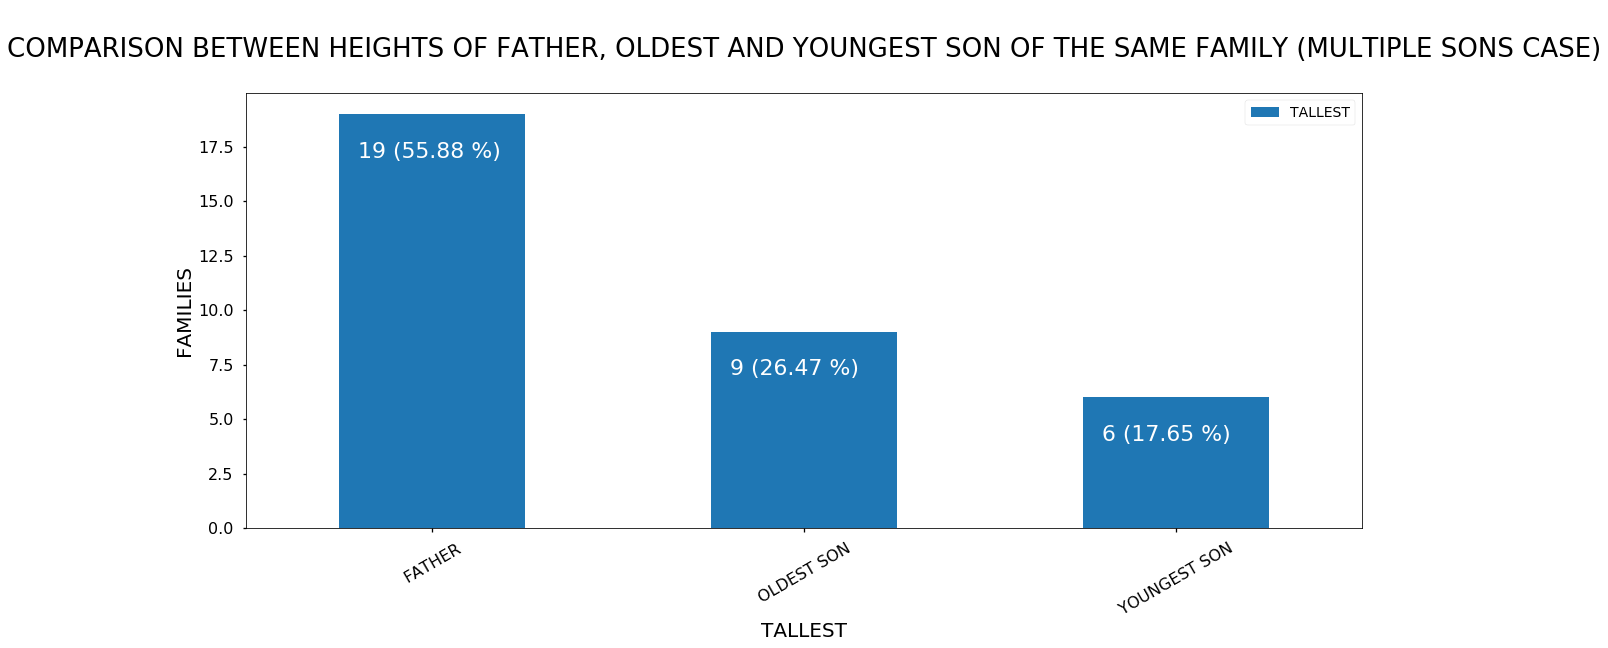

In [13]:
ax = td_f_df.plot(kind='bar',figsize=(20,8))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2))+' ('+str(round(p.get_height()/(tall_dict_father['YOUNGEST SON']+tall_dict_father['OLDEST SON']+tall_dict_father['FATHER'])*100,2))+' %)', (p.get_x()+0.05, p.get_height()-2), fontsize=22, color='w')
plt.xlabel('TALLEST',fontsize=20)
plt.ylabel('FAMILIES',fontsize=20)
plt.legend(fontsize=14)
plt.title('\nCOMPARISON BETWEEN HEIGHTS OF FATHER, OLDEST AND YOUNGEST SON OF THE SAME FAMILY (MULTIPLE SONS CASE)\n',fontsize=26)
plt.xticks(fontsize=16,rotation=30)
plt.yticks(fontsize=16)
plt.show()

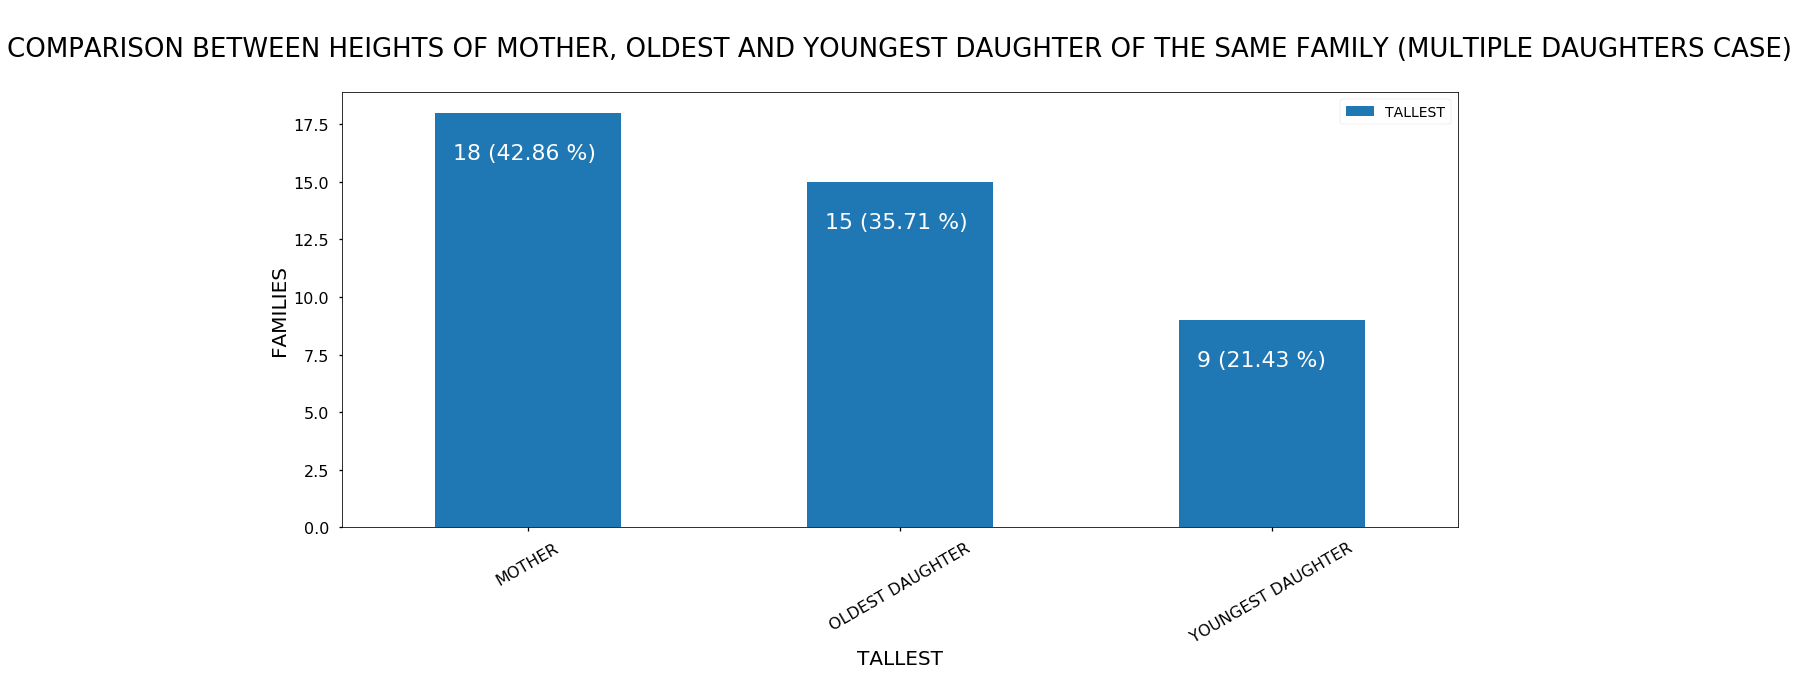

In [14]:
ax = td_m_df.plot(kind='bar',figsize=(20,8))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2))+' ('+str(round(p.get_height()/(tall_dict_mother['YOUNGEST DAUGHTER']+tall_dict_mother['OLDEST DAUGHTER']+tall_dict_mother['MOTHER'])*100,2))+' %)', (p.get_x()+0.05, p.get_height()-2), fontsize=22, color='w')
plt.xlabel('TALLEST',fontsize=20)
plt.ylabel('FAMILIES',fontsize=20)
plt.legend(fontsize=14)
plt.title('\nCOMPARISON BETWEEN HEIGHTS OF MOTHER, OLDEST AND YOUNGEST DAUGHTER OF THE SAME FAMILY (MULTIPLE DAUGHTERS CASE)\n',fontsize=26)
plt.xticks(fontsize=16,rotation=30)
plt.yticks(fontsize=16)
plt.show()

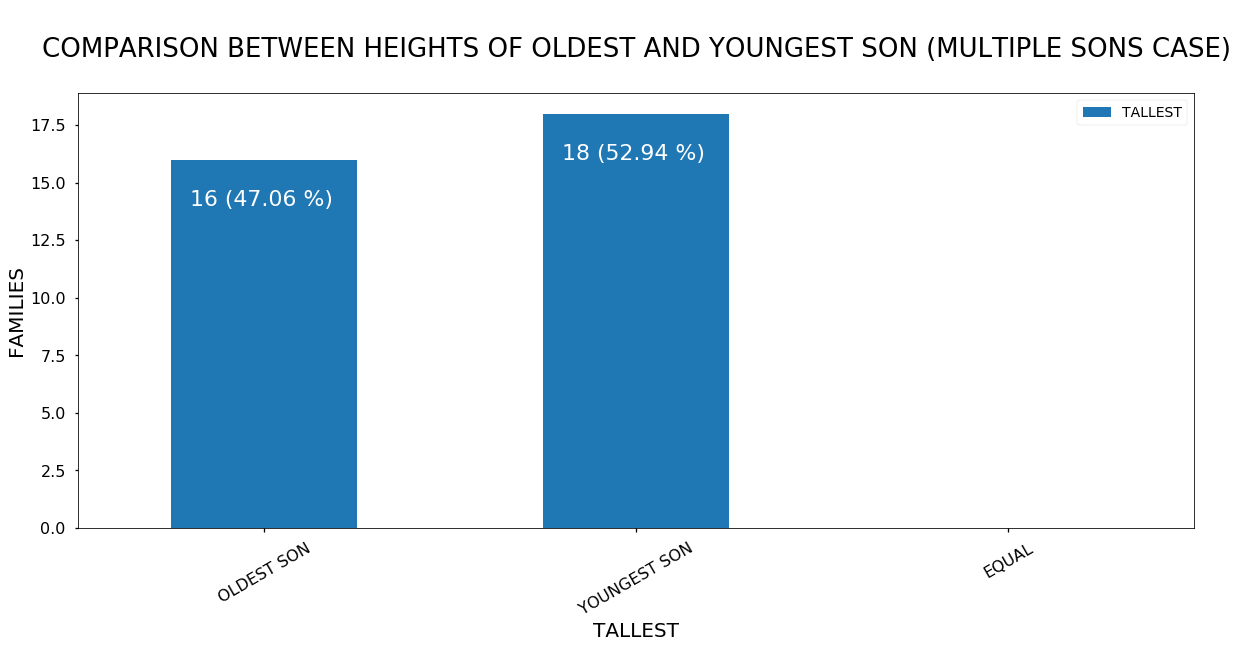

In [15]:
ax = oys_df.plot(kind='bar',figsize=(20,8))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2))+' ('+str(round(p.get_height()/(oys_dict['YOUNGEST SON']+oys_dict['OLDEST SON'])*100,2))+' %)', (p.get_x()+0.05, p.get_height()-2), fontsize=22, color='w')
plt.xlabel('TALLEST',fontsize=20)
plt.ylabel('FAMILIES',fontsize=20)
plt.legend(fontsize=14)
plt.title('\nCOMPARISON BETWEEN HEIGHTS OF OLDEST AND YOUNGEST SON (MULTIPLE SONS CASE)\n',fontsize=26)
plt.xticks(fontsize=16,rotation=30)
plt.yticks(fontsize=16)
plt.show()

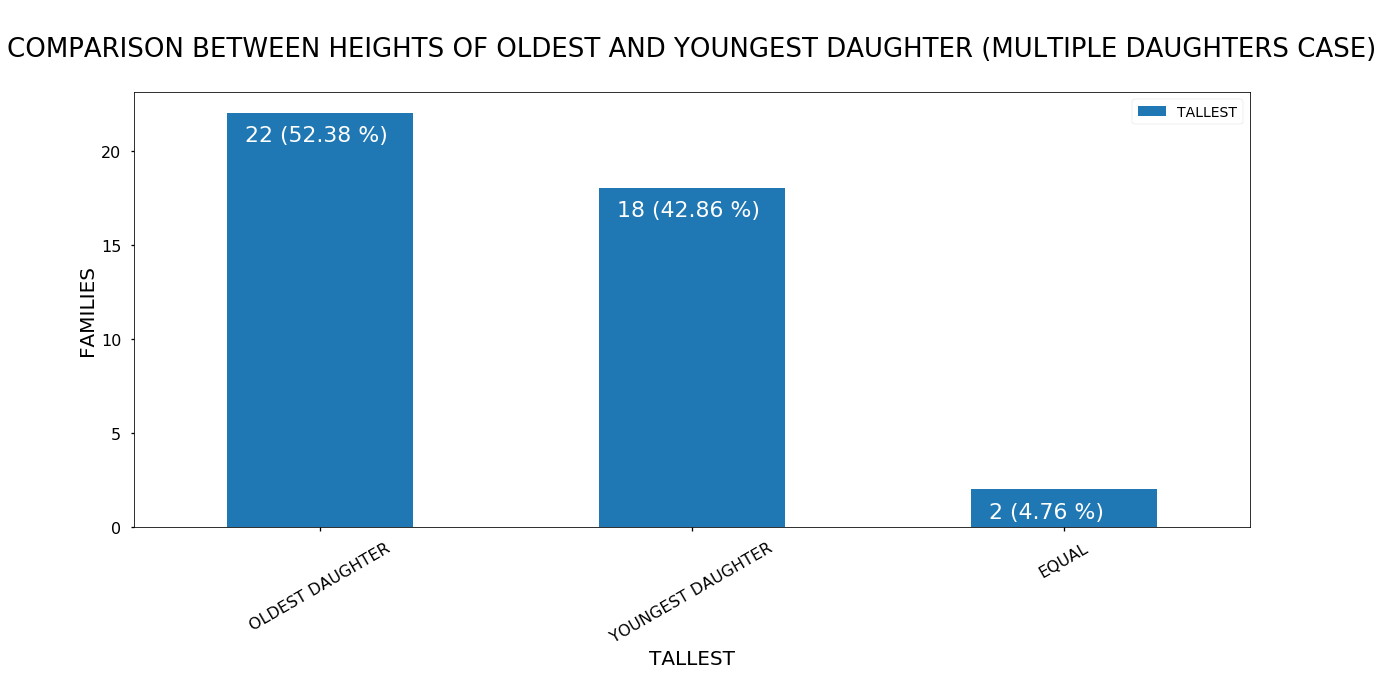

In [16]:
ax = oyd_df.plot(kind='bar',figsize=(20,8))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2))+' ('+str(round(p.get_height()/(oyd_dict['YOUNGEST DAUGHTER']+oyd_dict['OLDEST DAUGHTER']+oyd_dict['EQUAL'])*100,2))+' %)', (p.get_x()+0.05, p.get_height()-1.5), fontsize=22, color='w')
plt.xlabel('TALLEST',fontsize=20)
plt.ylabel('FAMILIES',fontsize=20)
plt.legend(fontsize=14)
plt.title('\nCOMPARISON BETWEEN HEIGHTS OF OLDEST AND YOUNGEST DAUGHTER (MULTIPLE DAUGHTERS CASE)\n',fontsize=26)
plt.xticks(fontsize=16,rotation=30)
plt.yticks(fontsize=16)
plt.show()

In [17]:
ysf_dict,osf_dict = dict(),dict()
ysf_dict['FATHER'],ysf_dict['YOUNGEST SON'],ysf_dict['EQUAL'],osf_dict['FATHER'],osf_dict['OLDEST SON'],osf_dict['EQUAL']=0,0,0,0,0,0
for i in range(len(s_oldest_list)):
    if s_oldest_list[i][4] != s_youngest_list[i][4]:
        if df.loc[s_oldest_list[i][0],'FATHER'].HEIGHT.values[0] > s_oldest_list[i][3]:
            osf_dict['FATHER'] += 1
        elif df.loc[s_oldest_list[i][0],'FATHER'].HEIGHT.values[0] < s_oldest_list[i][3]:
            osf_dict['OLDEST SON'] += 1
        elif df.loc[s_oldest_list[i][0],'FATHER'].HEIGHT.values[0] == s_oldest_list[i][3]:
            osf_dict['EQUAL'] +=1
for i in range(len(s_youngest_list)):
    if s_oldest_list[i][4] != s_youngest_list[i][4]:
        if df.loc[s_youngest_list[i][0],'FATHER'].HEIGHT.values[0] > s_youngest_list[i][3]:
            ysf_dict['FATHER'] += 1
        elif df.loc[s_youngest_list[i][0],'FATHER'].HEIGHT.values[0] < s_youngest_list[i][3]:
            ysf_dict['YOUNGEST SON'] += 1
        elif df.loc[s_youngest_list[i][0],'FATHER'].HEIGHT.values[0] == s_youngest_list[i][3]:
            ysf_dict['EQUAL'] +=1
        
ysf_df = (pd.DataFrame.from_dict(ysf_dict, orient='index').rename(columns={0:'TALLEST'}))
osf_df = (pd.DataFrame.from_dict(osf_dict, orient='index').rename(columns={0:'TALLEST'}))


ydm_dict,odm_dict = dict(),dict()
ydm_dict['MOTHER'],ydm_dict['YOUNGEST DAUGHTER'],ydm_dict['EQUAL'],odm_dict['MOTHER'],odm_dict['OLDEST DAUGHTER'],odm_dict['EQUAL']=0,0,0,0,0,0

for i in range(len(d_oldest_list)):
    if d_oldest_list[i][4] != d_youngest_list[i][4]:
        if df.loc[d_oldest_list[i][0],'MOTHER'].HEIGHT.values[0] > d_oldest_list[i][3]:
            odm_dict['MOTHER'] += 1
        elif df.loc[d_oldest_list[i][0],'MOTHER'].HEIGHT.values[0] < d_oldest_list[i][3]:
            odm_dict['OLDEST DAUGHTER'] += 1
        elif df.loc[d_oldest_list[i][0],'MOTHER'].HEIGHT.values[0] == d_oldest_list[i][3]:
            odm_dict['EQUAL'] +=1
for i in range(len(d_youngest_list)):
    if d_oldest_list[i][4] != d_youngest_list[i][4]:
        if df.loc[d_youngest_list[i][0],'MOTHER'].HEIGHT.values[0] > d_youngest_list[i][3]:
            ydm_dict['MOTHER'] += 1
        elif df.loc[d_youngest_list[i][0],'MOTHER'].HEIGHT.values[0] < d_youngest_list[i][3]:
            ydm_dict['YOUNGEST DAUGHTER'] += 1
        elif df.loc[d_youngest_list[i][0],'MOTHER'].HEIGHT.values[0] == d_youngest_list[i][3]:
            ydm_dict['EQUAL'] +=1

ydm_df = (pd.DataFrame.from_dict(ydm_dict, orient='index').rename(columns={0:'TALLEST'}))
odm_df = (pd.DataFrame.from_dict(odm_dict, orient='index').rename(columns={0:'TALLEST'}))
            
ssf_dict = dict()
ssf_dict['FATHER'],ssf_dict['SON'],ssf_dict['EQUAL']=0,0,0
for i in range(len(s_oldest_list)):
    if s_oldest_list[i][4] == s_youngest_list[i][4]:
        if df.loc[s_oldest_list[i][0],'FATHER'].HEIGHT.values[0] > s_oldest_list[i][3]:
            ssf_dict['FATHER'] += 1
        elif df.loc[s_oldest_list[i][0],'FATHER'].HEIGHT.values[0] < s_oldest_list[i][3]:
            ssf_dict['SON'] += 1
        elif df.loc[s_oldest_list[i][0],'FATHER'].HEIGHT.values[0] == s_oldest_list[i][3]:
            ssf_dict['EQUAL'] +=1
        
ssf_df = (pd.DataFrame.from_dict(ssf_dict, orient='index').rename(columns={0:'TALLEST'}))


sdm_dict = dict()
sdm_dict['MOTHER'],sdm_dict['DAUGHTER'],sdm_dict['EQUAL']=0,0,0

for i in range(len(d_oldest_list)):
    if d_oldest_list[i][4] == d_youngest_list[i][4]:
        if df.loc[d_oldest_list[i][0],'MOTHER'].HEIGHT.values[0] > d_oldest_list[i][3]:
            sdm_dict['MOTHER'] += 1
        elif df.loc[d_oldest_list[i][0],'MOTHER'].HEIGHT.values[0] < d_oldest_list[i][3]:
            sdm_dict['DAUGHTER'] += 1
        elif df.loc[d_oldest_list[i][0],'MOTHER'].HEIGHT.values[0] == d_oldest_list[i][3]:
            sdm_dict['EQUAL'] +=1

sdm_df = (pd.DataFrame.from_dict(sdm_dict, orient='index').rename(columns={0:'TALLEST'}))

In [18]:
print('\n--------------------------------\n MULTIPLE SONS / DAUGHTERS CASE\n--------------------------------')
print(ysf_df)
print()
print(osf_df)
print()
print(ydm_df)
print()
print(odm_df)
print('\n----------------------------\n SINGLE SON / DAUGHTER CASE\n----------------------------')
print(ssf_df)
print()
print(sdm_df)


--------------------------------
 MULTIPLE SONS / DAUGHTERS CASE
--------------------------------
              TALLEST
FATHER             12
YOUNGEST SON       18
EQUAL               4

            TALLEST
FATHER           13
OLDEST SON       15
EQUAL             6

                   TALLEST
MOTHER                  22
YOUNGEST DAUGHTER       16
EQUAL                    4

                 TALLEST
MOTHER                15
OLDEST DAUGHTER       24
EQUAL                  3

----------------------------
 SINGLE SON / DAUGHTER CASE
----------------------------
        TALLEST
FATHER       38
SON          45
EQUAL        10

          TALLEST
MOTHER         30
DAUGHTER       46
EQUAL           7


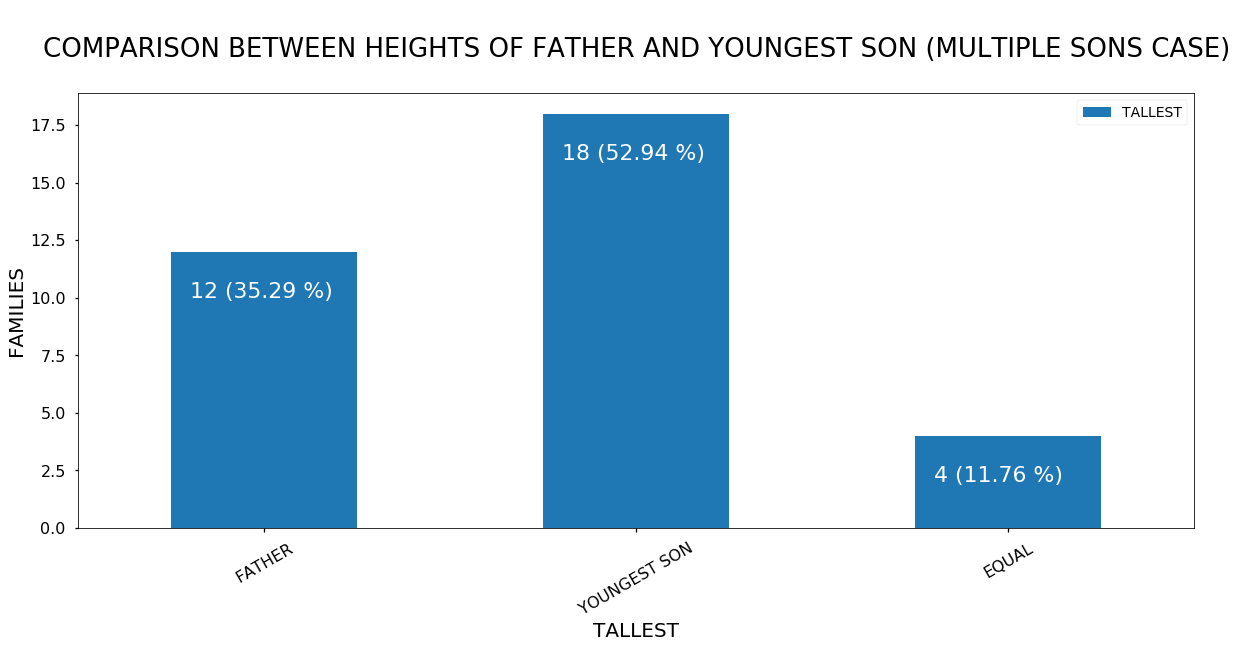

In [19]:
ax = ysf_df.plot(kind='bar',figsize=(20,8))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2))+' ('+str(round(p.get_height()/(ysf_dict['FATHER']+ysf_dict['YOUNGEST SON']+ysf_dict['EQUAL'])*100,2))+' %)', (p.get_x()+0.05, p.get_height()-2), fontsize=22, color='w')
plt.xlabel('TALLEST',fontsize=20)
plt.ylabel('FAMILIES',fontsize=20)
plt.legend(fontsize=14)
plt.title('\nCOMPARISON BETWEEN HEIGHTS OF FATHER AND YOUNGEST SON (MULTIPLE SONS CASE)\n',fontsize=26)
plt.xticks(fontsize=16,rotation=30)
plt.yticks(fontsize=16)
plt.show()

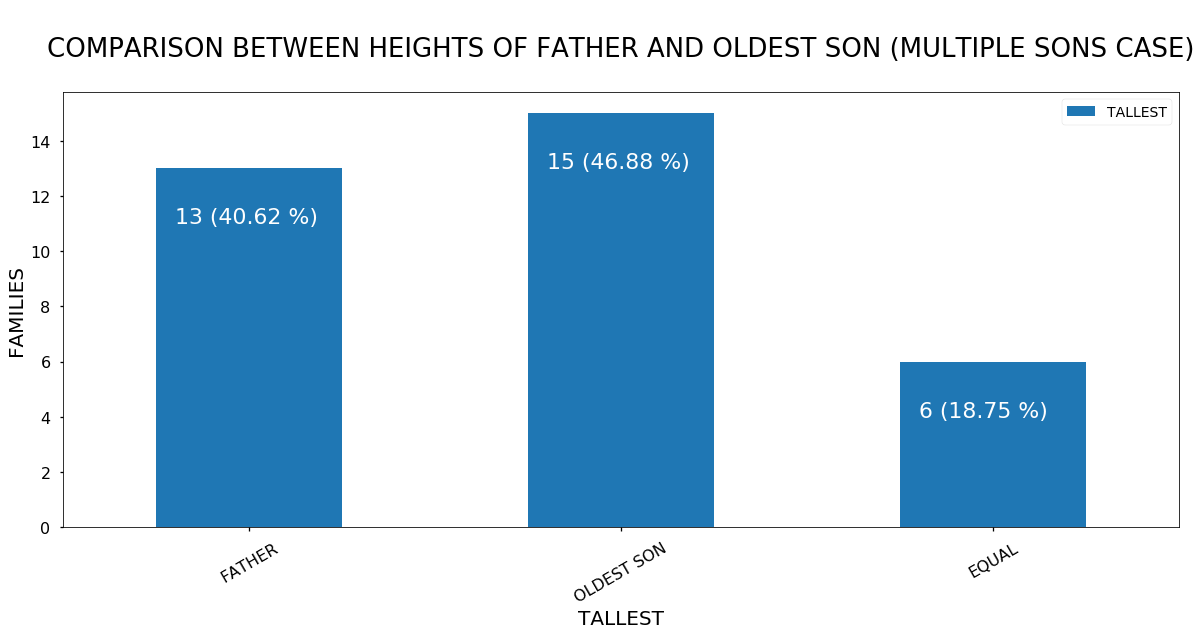

In [20]:
ax = osf_df.plot(kind='bar',figsize=(20,8))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2))+' ('+str(round(p.get_height()/(osf_dict['FATHER']+osf_dict['OLDEST SON']+ysf_dict['EQUAL'])*100,2))+' %)', (p.get_x()+0.05, p.get_height()-2), fontsize=22, color='w')
plt.xlabel('TALLEST',fontsize=20)
plt.ylabel('FAMILIES',fontsize=20)
plt.legend(fontsize=14)
plt.title('\nCOMPARISON BETWEEN HEIGHTS OF FATHER AND OLDEST SON (MULTIPLE SONS CASE)\n',fontsize=26)
plt.xticks(fontsize=16,rotation=30)
plt.yticks(fontsize=16)
plt.show()

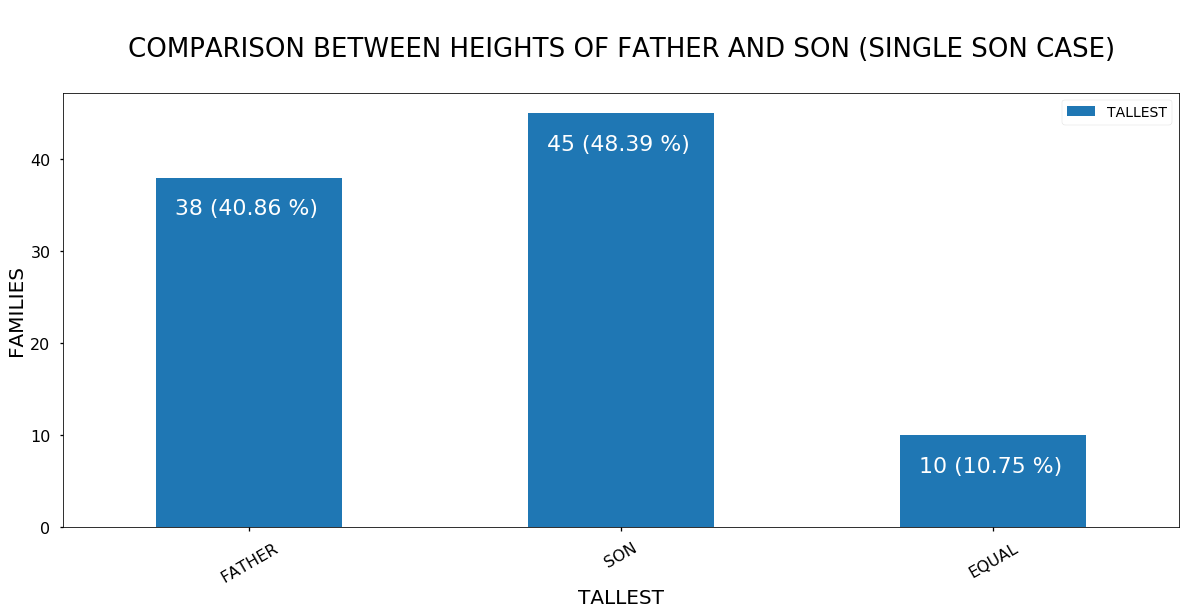

In [21]:
ax = ssf_df.plot(kind='bar',figsize=(20,8))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2))+' ('+str(round(p.get_height()/(ssf_dict['FATHER']+ssf_dict['SON']+ssf_dict['EQUAL'])*100,2))+' %)', (p.get_x()+0.05, p.get_height()-4), fontsize=22, color='w')
plt.xlabel('TALLEST',fontsize=20)
plt.ylabel('FAMILIES',fontsize=20)
plt.legend(fontsize=14)
plt.title('\nCOMPARISON BETWEEN HEIGHTS OF FATHER AND SON (SINGLE SON CASE)\n',fontsize=26)
plt.xticks(fontsize=16,rotation=30)
plt.yticks(fontsize=16)
plt.show()

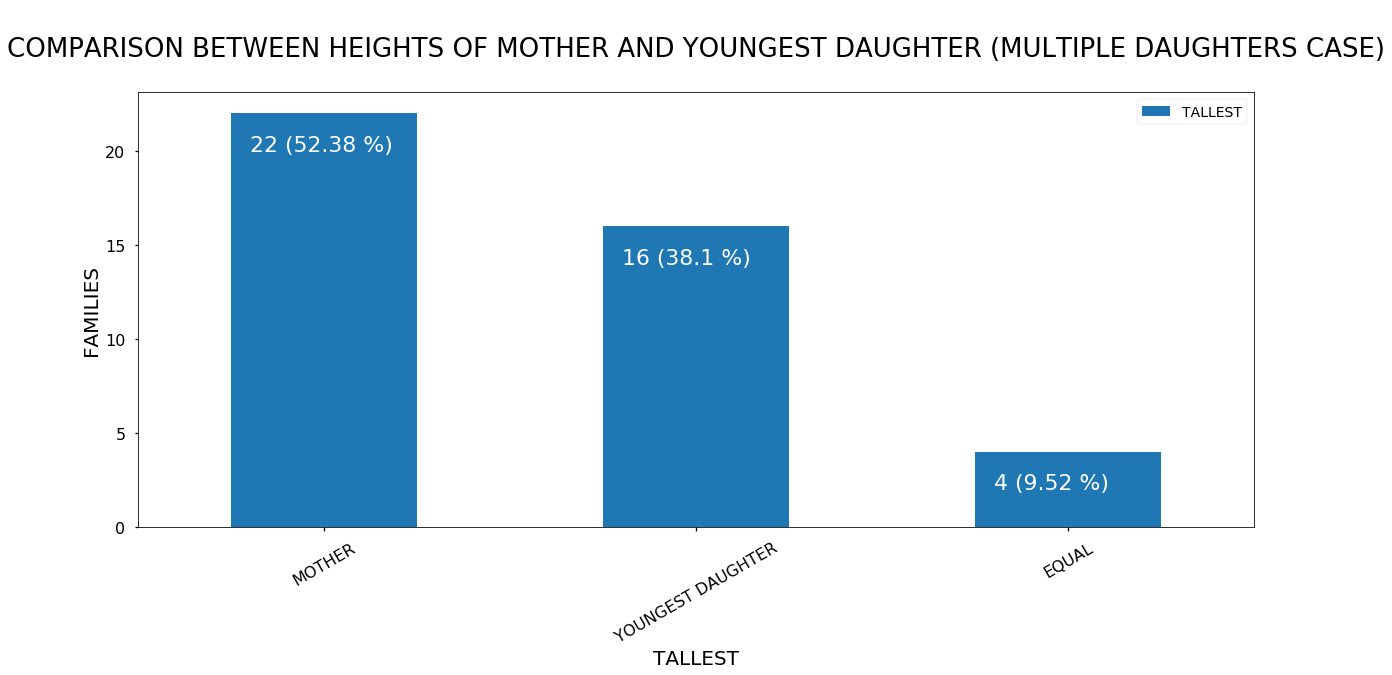

In [22]:
ax = ydm_df.plot(kind='bar',figsize=(20,8))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2))+' ('+str(round(p.get_height()/(ydm_dict['MOTHER']+ydm_dict['YOUNGEST DAUGHTER']+ydm_dict['EQUAL'])*100,2))+' %)', (p.get_x()+0.05, p.get_height()-2), fontsize=22, color='w')
plt.xlabel('TALLEST',fontsize=20)
plt.ylabel('FAMILIES',fontsize=20)
plt.legend(fontsize=14)
plt.title('\nCOMPARISON BETWEEN HEIGHTS OF MOTHER AND YOUNGEST DAUGHTER (MULTIPLE DAUGHTERS CASE)\n',fontsize=26)
plt.xticks(fontsize=16,rotation=30)
plt.yticks(fontsize=16)
plt.show()

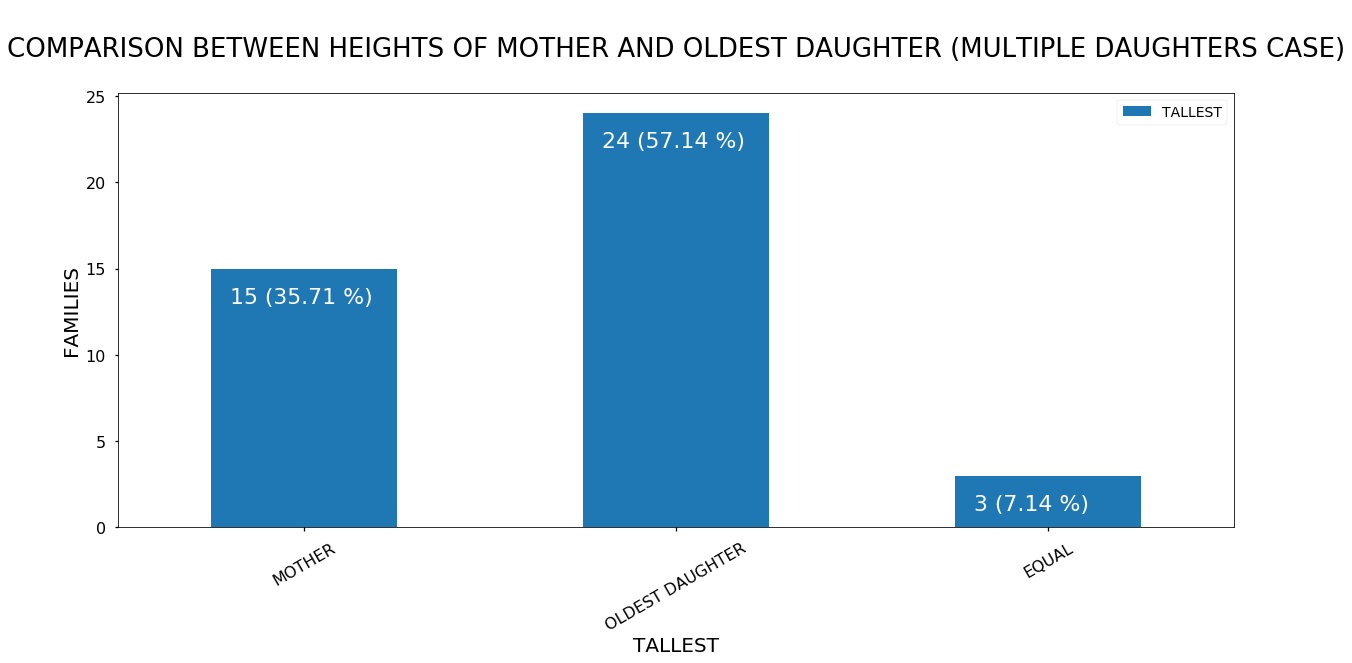

In [23]:
ax = odm_df.plot(kind='bar',figsize=(20,8))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2))+' ('+str(round(p.get_height()/(odm_dict['MOTHER']+odm_dict['OLDEST DAUGHTER']+odm_dict['EQUAL'])*100,2))+' %)', (p.get_x()+0.05, p.get_height()-2), fontsize=22, color='w')
plt.xlabel('TALLEST',fontsize=20)
plt.ylabel('FAMILIES',fontsize=20)
plt.legend(fontsize=14)
plt.title('\nCOMPARISON BETWEEN HEIGHTS OF MOTHER AND OLDEST DAUGHTER (MULTIPLE DAUGHTERS CASE)\n',fontsize=26)
plt.xticks(fontsize=16,rotation=30)
plt.yticks(fontsize=16)
plt.show()

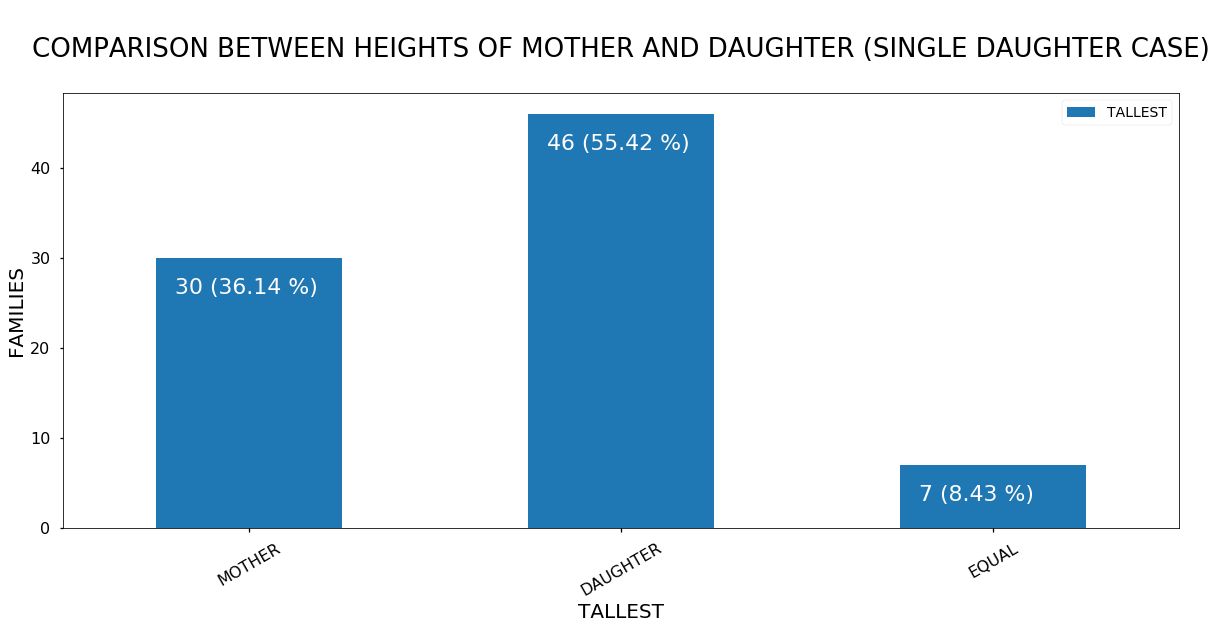

In [24]:
ax = sdm_df.plot(kind='bar',figsize=(20,8))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2))+' ('+str(round(p.get_height()/(sdm_dict['MOTHER']+sdm_dict['DAUGHTER']+sdm_dict['EQUAL'])*100,2))+' %)', (p.get_x()+0.05, p.get_height()-4), fontsize=22, color='w')
plt.xlabel('TALLEST',fontsize=20)
plt.ylabel('FAMILIES',fontsize=20)
plt.legend(fontsize=14)
plt.title('\nCOMPARISON BETWEEN HEIGHTS OF MOTHER AND DAUGHTER (SINGLE DAUGHTER CASE)\n',fontsize=26)
plt.xticks(fontsize=16,rotation=30)
plt.yticks(fontsize=16)
plt.show()

In [25]:
tall_dict_parents = dict()
tall_dict_parents['MOTHER'],tall_dict_parents['FATHER']=0,0

for i in range(df.index.max()[0]):
    if df.loc[i+1,'MOTHER'].HEIGHT.values[0] < df.loc[i+1,'FATHER'].HEIGHT.values[0]:
        tall_dict_parents['FATHER'] += 1
    else:
        tall_dict_parents['MOTHER'] += 1
td_p_df = (pd.DataFrame.from_dict(tall_dict_parents, orient='index').rename(columns={0:'TALLEST'}))

td_p_df

,TALLEST
MOTHER,17
FATHER,146


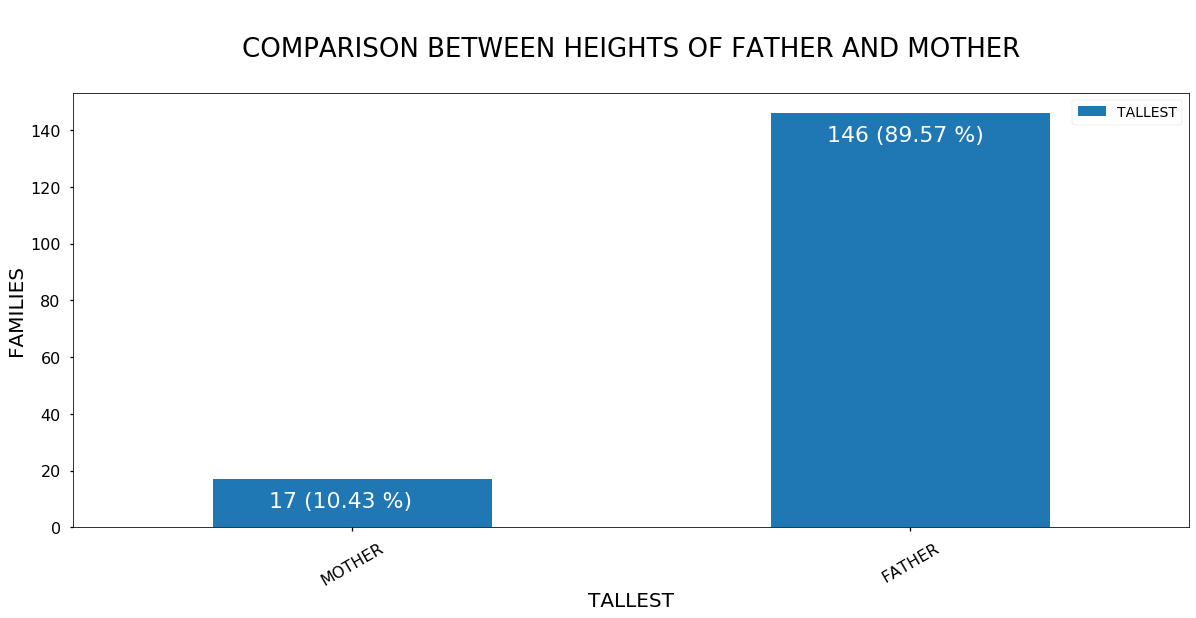

In [26]:
ax = td_p_df.plot(kind='bar',figsize=(20,8))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2))+' ('+str(round(p.get_height()/(tall_dict_parents['FATHER']+tall_dict_parents['MOTHER'])*100,2))+' %)', (p.get_x()+0.1, p.get_height()-10), fontsize=22, color='w')
plt.xlabel('TALLEST',fontsize=20)
plt.ylabel('FAMILIES',fontsize=20)
plt.legend(fontsize=14)
plt.title('\nCOMPARISON BETWEEN HEIGHTS OF FATHER AND MOTHER\n',fontsize=26)
plt.xticks(fontsize=16,rotation=30)
plt.yticks(fontsize=16)
plt.show()